In [ ]:
# Import the machine learning libraries.
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, LSTM
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt

In [ ]:
x = np.arange(0, 200, 0.5).reshape(-1, 1)
y = np.sin(x).reshape(-1, 1)
print(x.shape, y.shape)

(400, 1) (400, 1)


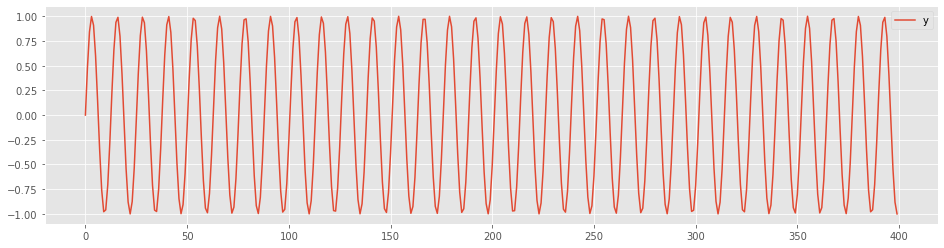

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(16, 4))
#plt.plot(x, label="x")
plt.plot(y, label="y")
plt.legend()

In [ ]:
def lstm_data_transform(x_data, y_data, num_steps=5):
    # Changes data to the format for LSTM training for sliding window approach.
    # Prepare the list for the transformed data
    X, y = list(), list()
    # Loop of the entire data set
    for i in range(x_data.shape[0]):
        # compute a new (sliding window) index
        end_ix = i + num_steps
        # if index is larger than the size of the dataset, we stop
        if end_ix >= x_data.shape[0]:
            break
        # Get a sequence of data for x
        seq_X = x_data[i:end_ix]
        # Get only the last element of the sequency for y
        seq_y = y_data[end_ix]
        # Append the list with sequencies
        X.append(seq_X)
        y.append(seq_y)
    # Make final arrays
    x_array = np.array(X)
    y_array = np.array(y)
    return x_array, y_array

In [ ]:
num_steps = 10
x_new, y_new = lstm_data_transform(y, y, num_steps=num_steps)
print(x_new.shape, y_new.shape)

(390, 10, 1) (390, 1)


In [ ]:
# Split the dataset into the training set and test subsets.
train_ind = int(0.7 * x.shape[0]) # 70% for training set and 30% for testing set.
x_train = x_new[:train_ind]
y_train = y_new[:train_ind]
x_test = x_new[train_ind:]
y_test = y_new[train_ind:]
print(train_ind)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

280
(280, 10, 1) (280, 1) (110, 10, 1) (110, 1)


In [ ]:
model = Sequential()
model.add(LSTM(100, activation='tanh', input_shape=(num_steps, 1), return_sequences=False))
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=1, activation='linear'))
adam = optimizers.Adam(lr=0.0001)
model.compile(optimizer=adam, loss='mse')
history = model.fit(x_train, y_train, epochs=50)

Epoch 1/50
9/9 [==============================] - 0s 8ms/step - loss: 0.5058
Epoch 2/50
9/9 [==============================] - 0s 7ms/step - loss: 0.4837
Epoch 3/50
9/9 [==============================] - 0s 7ms/step - loss: 0.4628
Epoch 4/50
9/9 [==============================] - 0s 8ms/step - loss: 0.4415
Epoch 5/50
9/9 [==============================] - 0s 7ms/step - loss: 0.4190
Epoch 6/50
9/9 [==============================] - 0s 7ms/step - loss: 0.3946
Epoch 7/50
9/9 [==============================] - 0s 7ms/step - loss: 0.3672
Epoch 8/50
9/9 [==============================] - 0s 7ms/step - loss: 0.3359
Epoch 9/50
9/9 [==============================] - 0s 7ms/step - loss: 0.3011
Epoch 10/50
9/9 [==============================] - 0s 7ms/step - loss: 0.2633
Epoch 11/50
9/9 [==============================] - 0s 7ms/step - loss: 0.2219
Epoch 12/50
9/9 [==============================] - 0s 8ms/step - loss: 0.1801
Epoch 13/50
9/9 [==============================] - 0s 7ms/step - loss: 0.

dict_keys(['loss'])


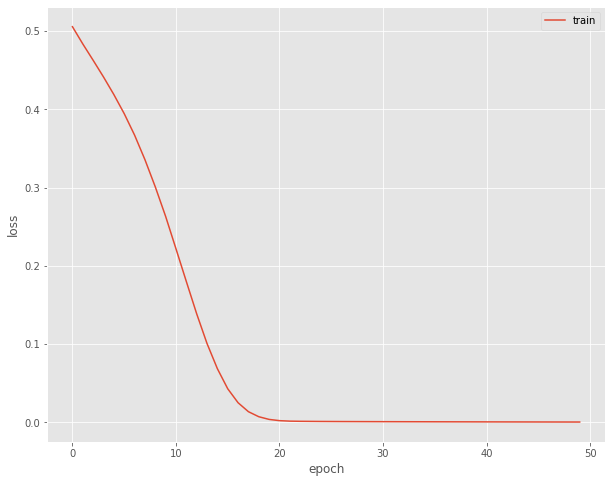

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for loss
plt.figure(figsize=(10, 8))
plt.plot(history.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

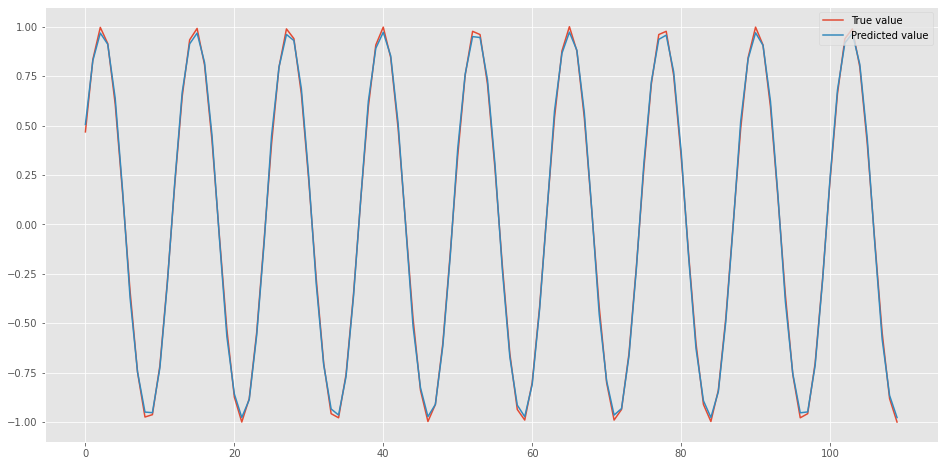

In [ ]:
test_predict = model.predict(x_test)
plt.figure(figsize=(16, 8))
plt.plot(y_test)
plt.plot(test_predict.ravel())
plt.legend(['True value', 'Predicted value'], loc='upper right')

In [ ]:
from sklearn.metrics import r2_score
print("R squred: %.4f" % r2_score(y_test, test_predict.ravel()))

R squred: 0.9992
